In [0]:
import pandas as pd
import numpy as np

In [57]:
!curl -L http://bit.ly/dw_car_data -o car.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   152  100   152    0     0   5846      0 --:--:-- --:--:-- --:--:--  5846
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 57.7M  100 57.7M    0     0  26.4M      0  0:00:02  0:00:02 --:--:-- 39.5M


In [58]:
!ls

car.h5	sample_data


In [59]:
!pip install --upgrade tables

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [60]:
df = pd.read_hdf('car.h5')
df.head(2)

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
0,"[Osobowe, Dacia, Logan, Dacia Logan II (2012-)]","13:23, 5 marca 2018",PLN,Cena Brutto,45100.0,"Krasne 7A - 36-007 Krasne, rzeszowski, Podkarp...",AUTO SPEKTRUM,Dealer,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,None,None,Firmy,90 KM,None,None,None,None,None,Benzyna+LPG,None,None,None,None,None,None,None,Logan,898 cm3,None,None,None,None,None,None,None,None,None,Inny kolor,None,None,Nowe,II (2012-),None,None,None,Tak,None,None,0
2,"[Osobowe, Peugeot, 3008, Peugeot 3008 I (2009-...","15:48, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",28000.0,"Tomaszów Mazowiecki, tomaszowski, Łódzkie",None,Osoba prywatna,False,False,False,True,False,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,None,Tak,Osoby prywatnej,115 KM,None,Polska,None,None,None,Diesel,None,None,None,None,None,None,None,3008,1 560 cm3,None,None,None,None,None,None,None,None,None,Czarny,None,None,Używane,I (2009-2016),None,None,None,Tak,None,None,2


In [61]:
!pip install --upgrade tables

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

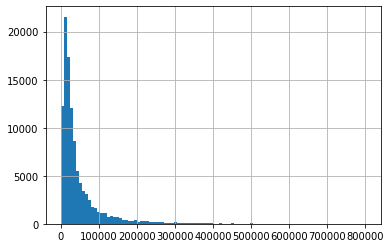

In [63]:
df['price_value'].hist(bins=100)

In [64]:
df.price_value.max(), df.price_value.min()

(799900.0, 400.0)

In [65]:
df.price_value.describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [66]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

In [67]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [68]:
df.groupby(['param_marka-pojazdu'])['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', subplots=True):
  print(feat_groupby)
  return ( df
          .groupby([feat_groupby])[feat_agg]
          .agg(agg_funcs)
         .sort_values(by=feat_sort, ascending=False)
          .head(40)).plot(kind='bar', figsize=(15,5), subplots=subplots) 

param_marka-pojazdu


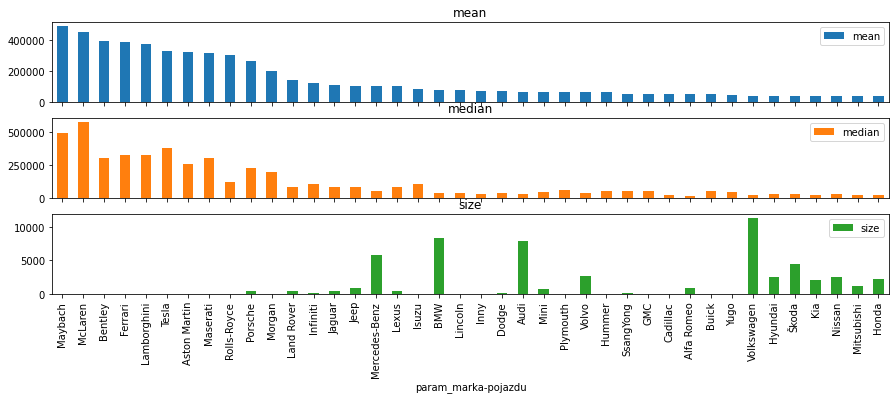

In [70]:
group_and_barplot('param_marka-pojazdu');

param_country-of-origin
param_kraj-pochodzenia


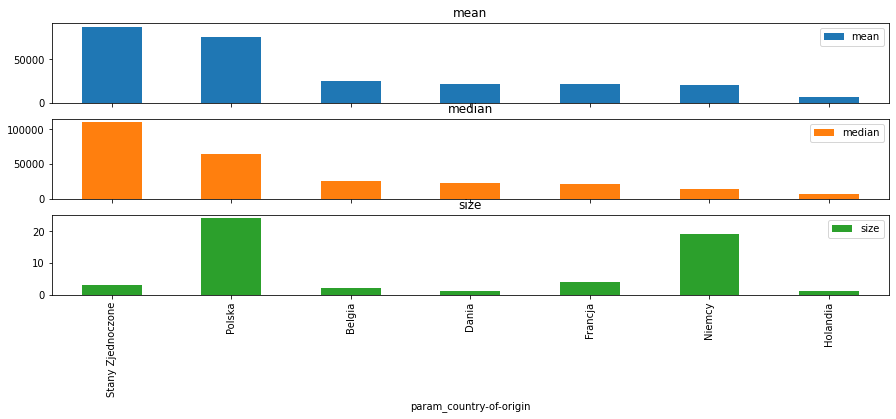

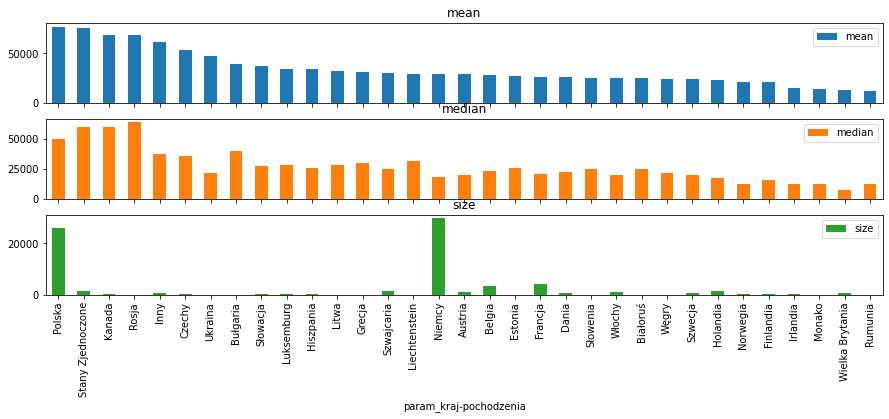

In [71]:
group_and_barplot('param_country-of-origin');
group_and_barplot('param_kraj-pochodzenia');

# 'param_color'


param_kraj-pochodzenia


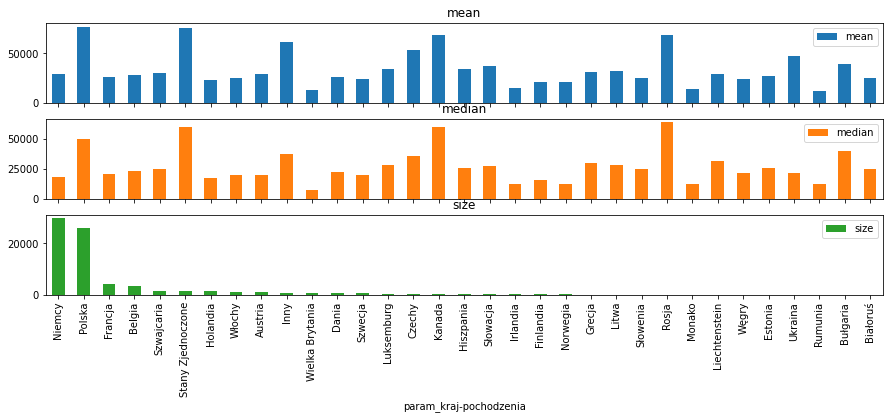

In [72]:
group_and_barplot('param_kraj-pochodzenia', feat_sort='size');

param_color


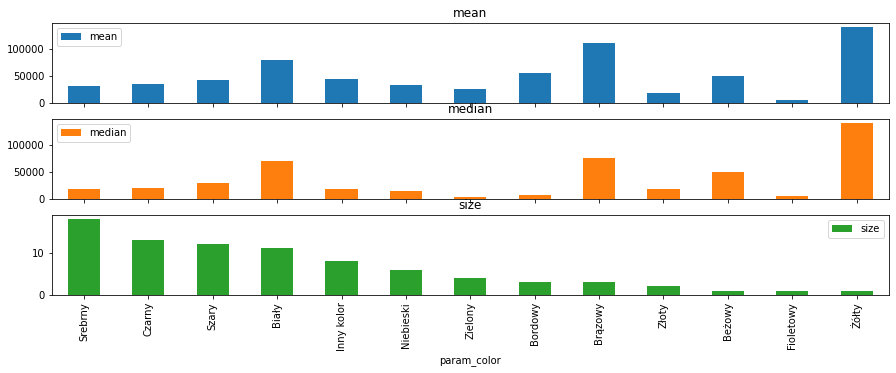

In [73]:
group_and_barplot('param_color', feat_sort='size');

In [74]:
!pip install --upgrade tables
!pip install eli5

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [0]:
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance

In [76]:
feats = ['car_id']
X = df[feats].values
y = df[feats].values

model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

mae(y,y_pred)

40104.125306754606

In [77]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [78]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [79]:
df = df[ df.price_currency != 'EUR']
df.shape

(106290, 155)

In [0]:
SUFFIX_CAT = '__cat'

for feat in df.columns:
  if isinstance(df[feat][0], list): continue
  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat+SUFFIX_CAT] = factorized_values


In [81]:
df.head(2)

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter__cat,param_zarejestrowany-w-polsce__cat,param_oferta-od__cat,param_moc__cat,param_make__cat,param_kraj-pochodzenia__cat,param_engine-power__cat,param_year__cat,param_serwisowany-w-aso__cat,param_rodzaj-paliwa__cat,param_możliwość-finansowania__cat,param_registered-in-poland__cat,param_transmission__cat,param_miesięczna-rata__cat,param_kod-silnika__cat,param_version__cat,param_opłata-początkowa__cat,param_model-pojazdu__cat,param_pojemność-skokowa__cat,param_kierownica-po-prawej-(anglik)__cat,param_fuel-type__cat,param_vat-free__cat,param_acrylic__cat,param_damaged__cat,param_door-count__cat,param_tuning__cat,param_filtr-cząstek-stałych__cat,param_nr-of-seats__cat,param_kolor__cat,param_engine-capacity__cat,param_pearl__cat,param_stan__cat,param_wersja__cat,param_emisja-co2__cat,param_body-type__cat,param_matowy__cat,param_bezwypadkowy__cat,param_akryl-(niemetalizowany)__cat,param_monthly-payment-value__cat,car_id__cat
0,"[Osobowe, Dacia, Logan, Dacia Logan II (2012-)]","13:23, 5 marca 2018",PLN,Cena Brutto,45100.0,"Krasne 7A - 36-007 Krasne, rzeszowski, Podkarp...",AUTO SPEKTRUM,Dealer,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,-1,-1,0,0,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,0,0,-1,-1,-1,0,-1,-1,0
2,"[Osobowe, Peugeot, 3008, Peugeot 3008 I (2009-...","15:48, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",28000.0,"Tomaszów Mazowiecki, tomaszowski, Łódzkie",None,Osoba prywatna,False,False,False,True,False,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,-1,0,1,1,-1,0,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,-1,0,-1,-1,1


In [82]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]
len(cat_feats)

151

In [83]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
model.fit(X,y)
model.predict(X)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-19566.588937368328

In [84]:
imp = PermutationImportance(model).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2585 ± 0.0068,param_napęd__cat
0.2060 ± 0.0093,param_faktura-vat__cat
0.1919 ± 0.0048,param_stan__cat
0.1455 ± 0.0052,param_rok-produkcji__cat
0.0635 ± 0.0040,param_moc__cat
0.0416 ± 0.0006,feature_kamera-cofania__cat
0.0410 ± 0.0015,param_skrzynia-biegów__cat
0.0285 ± 0.0021,param_marka-pojazdu__cat
0.0195 ± 0.0014,param_pojemność-skokowa__cat
0.0164 ± 0.0003,feature_bluetooth__cat


In [85]:
!pip install xgboost

In [0]:
import xgboost as xgb
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [0]:
def run_model(model, feats):
  X = df[feats].values
  y = df['price_value'].values

  scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [88]:
run_model(DecisionTreeRegressor(max_depth=5), cat_feats)

-19566.588937368328

In [89]:
run_model(RandomForestRegressor(max_depth=5, n_estimators=50, random_state=0), cat_feats)

-18734.2072708522

In [0]:
xgb_params = {
    'max_depth': 5,
    'n_estimators': 50,
    'learning_rate': 0.1,
    'seed': 0
}

In [91]:
run_model(xgb.XGBRegressor(**xgb_params), cat_feats)

[07:51:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-13039.290196724838

In [92]:
len(cat_feats)

151

In [93]:
m = xgb.XGBRegressor(**xgb_params)
m.fit(X,y)

imp = PermutationImportance(model).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)

[07:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Weight,Feature
0.2533 ± 0.0062,param_napęd__cat
0.2052 ± 0.0093,param_faktura-vat__cat
0.1947 ± 0.0047,param_stan__cat
0.1451 ± 0.0073,param_rok-produkcji__cat
0.0633 ± 0.0018,param_moc__cat
0.0417 ± 0.0011,feature_kamera-cofania__cat
0.0412 ± 0.0013,param_skrzynia-biegów__cat
0.0278 ± 0.0037,param_marka-pojazdu__cat
0.0199 ± 0.0021,param_pojemność-skokowa__cat
0.0163 ± 0.0002,feature_bluetooth__cat


In [0]:
feats_best = [
'param_napęd__cat',
'param_faktura-vat__cat',
'param_stan__cat',
'param_rok-produkcji__cat',
'param_moc__cat',
'feature_kamera-cofania__cat',
'param_skrzynia-biegów__cat',
'param_marka-pojazdu__cat',
'param_pojemność-skokowa__cat',
'feature_bluetooth__cat',
'feature_łopatki-zmiany-biegów__cat',
'feature_światła-led__cat',
'feature_klimatyzacja-manualna__cat',
'param_kod-silnika__cat',
'feature_gniazdo-aux__cat',
'feature_klimatyzacja-automatyczna__cat',
'feature_radio-fabryczne__cat',
'feature_czujniki-parkowania-tylne__cat',
'feature_poduszki-boczne-tylne__cat',
'feature_odtwarzacz-dvd__cat']

In [95]:
model = xgb.XGBRegressor(**xgb_params)
X = df[feats_best].values
model.fit(X,y)

imp = PermutationImportance(model).fit(X,y)
eli5.show_weights(imp, feature_names=feats_best)

[07:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Weight,Feature
0.2383 ± 0.0035,param_rok-produkcji__cat
0.1541 ± 0.0054,param_napęd__cat
0.1110 ± 0.0025,param_stan__cat
0.0784 ± 0.0028,param_skrzynia-biegów__cat
0.0697 ± 0.0009,param_moc__cat
0.0632 ± 0.0015,param_faktura-vat__cat
0.0550 ± 0.0015,param_marka-pojazdu__cat
0.0317 ± 0.0015,param_pojemność-skokowa__cat
0.0314 ± 0.0016,param_kod-silnika__cat
0.0267 ± 0.0008,feature_kamera-cofania__cat


In [96]:
run_model(xgb.XGBRegressor(**xgb_params), feats_best)

[07:54:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-13944.693038259677

In [97]:
df['param_rok-produkcji'] = df['param_rok-produkcji'].map(lambda x: -1 if str(x) == 'None' else int(x))
feats_best.append('param_rok-produkcji')

run_model(xgb.XGBRegressor(**xgb_params), feats_best)

[07:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-11985.382295819056

In [98]:
df['param_pojemność-skokowa'].unique()

array(['898 cm3', '1 560 cm3', '3 000 cm3', ..., '5 992 cm3', '1 966 cm3',
       '142 280 cm3'], dtype=object)

In [0]:
df['param_moc'] = df['param_moc'].map(lambda x: -1 if str(x) == 'None' else int(str(x).split(' ')[0]))

In [0]:
df['param_rok-produkcji'] = df['param_rok-produkcji'].map(lambda x: -1 if str(x) == 'None' else int(x))
df['param_pojemność-skokowa'] = df['param_pojemność-skokowa'].map(lambda x: -1 if str(x) == 'None' else int(x.split('cm')[0].replace(' ','')))

In [101]:
df['param_pojemność-skokowa'].unique()

array([   898,   1560,   3000, ...,   5992,   1966, 142280])

In [102]:
feats_best.append('param_pojemność-skokowa')
feats_best.append('param_moc')
feats_best.append('param_rok-produkcji')

run_model(xgb.XGBRegressor(**xgb_params), feats_best)

[07:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-9878.263964049105

In [0]:
# Hyperopt 

In [104]:
!pip install hyperopt

In [0]:
from hyperopt import hp, fmin, tpe, STATUS_OK

In [0]:
xgb_params = {
    'max_depth': 5,
    'n_estimators': 50,
    'learning_rate': 0.1,
    'seed': 0
}

In [114]:
def obj_func(params):
  print("Training with params:", params)
  mean_mae, score_std = run_model(xgb.XGBRegressor(**params), feats_best)
  return {'loss': np.abs(mean_mae), 'status':STATUS_OK}

xgb_reg_params = {
      'learning_rate': hp.choice('learning_rate', np.arange(0.05, 0.31, 0.05)),
      'max_depth':     hp.choice('max_depth',  np.arange(5,16,1, dtype=int)),
      'subsample':    hp.quniform('subsample',  0.5, 1, 0.05),
      'colsample_bytree':  hp.quniform('colsample_bytree',  0.5, 1, 0.05),
      'objective':   'reg:squarederror',
      'n_estimators': 100,
      'seed': 0 }

best = fmin(obj_func, xgb_reg_params, algo=tpe.suggest, max_evals=25)

Training with params:
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.75}
Training with params:
{'colsample_bytree': 0.55, 'learning_rate': 0.25, 'max_depth': 9, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.8}
Training with params:
{'colsample_bytree': 0.55, 'learning_rate': 0.25, 'max_depth': 8, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.6000000000000001}
Training with params:
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.25, 'max_depth': 15, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.55}
Training with params:
{'colsample_bytree': 0.5, 'learning_rate': 0.25, 'max_depth': 12, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.55}
Training with params:
{'colsample_bytree': 0.9500000000000001, 'learning_rate': 0.3, 'max_depth': 9, 'n_estimator

In [0]:
run_model(xgb.XGBRegressor(**xgb_params), feats_best)